# Load data

In [1]:
import numpy as np
import pandas as pd
import anndata
import os

In [2]:
import torch
import pickle
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "/bigstore/GeneralStorage/fangming/projects/visctx/propose")
from propose import PROPOSE, HurdleLoss, ExpressionDataset
from propose import models, Accuracy

from dredFISH.Utils import basicu
from dredFISH.Utils.__init__plots import *

In [3]:
ddir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/counts/'
resdir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/test_propose'
f = os.path.join(ddir, "P38_1a2a_glut.h5ad")
adata = anndata.read(f)
adata

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3751 × 53547
    obs: 'cov', 'covfactor', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'id'

In [4]:
!ls $resdir

classification_metric.pkl
classification_metric_v2.pkl
eval_L234_allgenes_sep13.pkl
eval_L234_allgenes_sep14.pkl
eval_merfish_L234_allgenes_oct6.pkl
eval_merfish_L234_allgenes_unsupervised_oct13.pkl
fig_L234_allgenes_sep13.pdf
fig_L234_allgenes_sep14.pdf
fig_merfish_L234_allgenes_oct6.pdf
propose_class_results.pkl
propose_class_results_v2.pkl
res_L234_allgenes_sep13.pkl
res_L234_allgenes_sep14.pkl
res_merfish_L234_allgenes_oct6.pkl
res_merfish_L234_allgenes_unsupervised_oct13.pkl


# Plot eval

In [5]:
# Plot results
with open(os.path.join(resdir, 'eval_merfish_L234_allgenes_oct6.pkl'), 'rb') as f:
    results = pickle.load(f)
num_features = list(results['PROPOSE-Class'].keys())

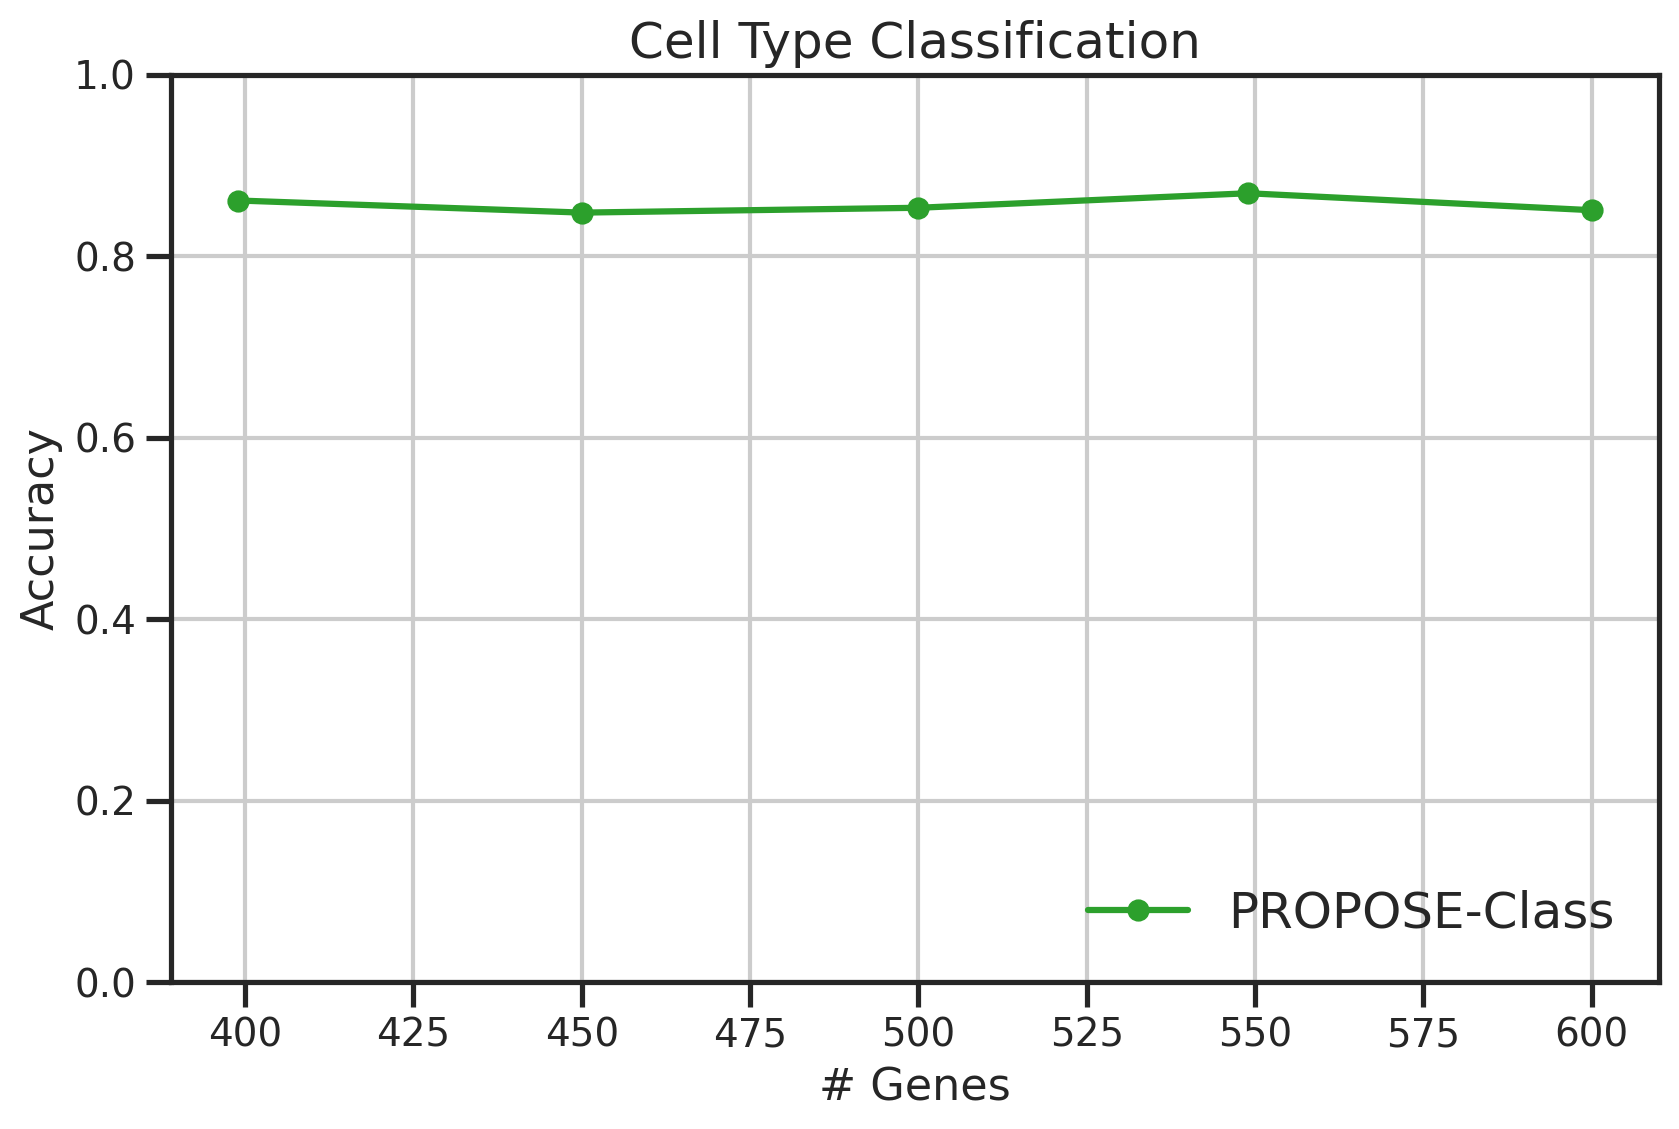

In [6]:
# Make plot
plt.figure(figsize=(9, 6))
plt.plot(num_features, [results['PROPOSE-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2', label='PROPOSE-Class')
plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
plt.ylim([0,1])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


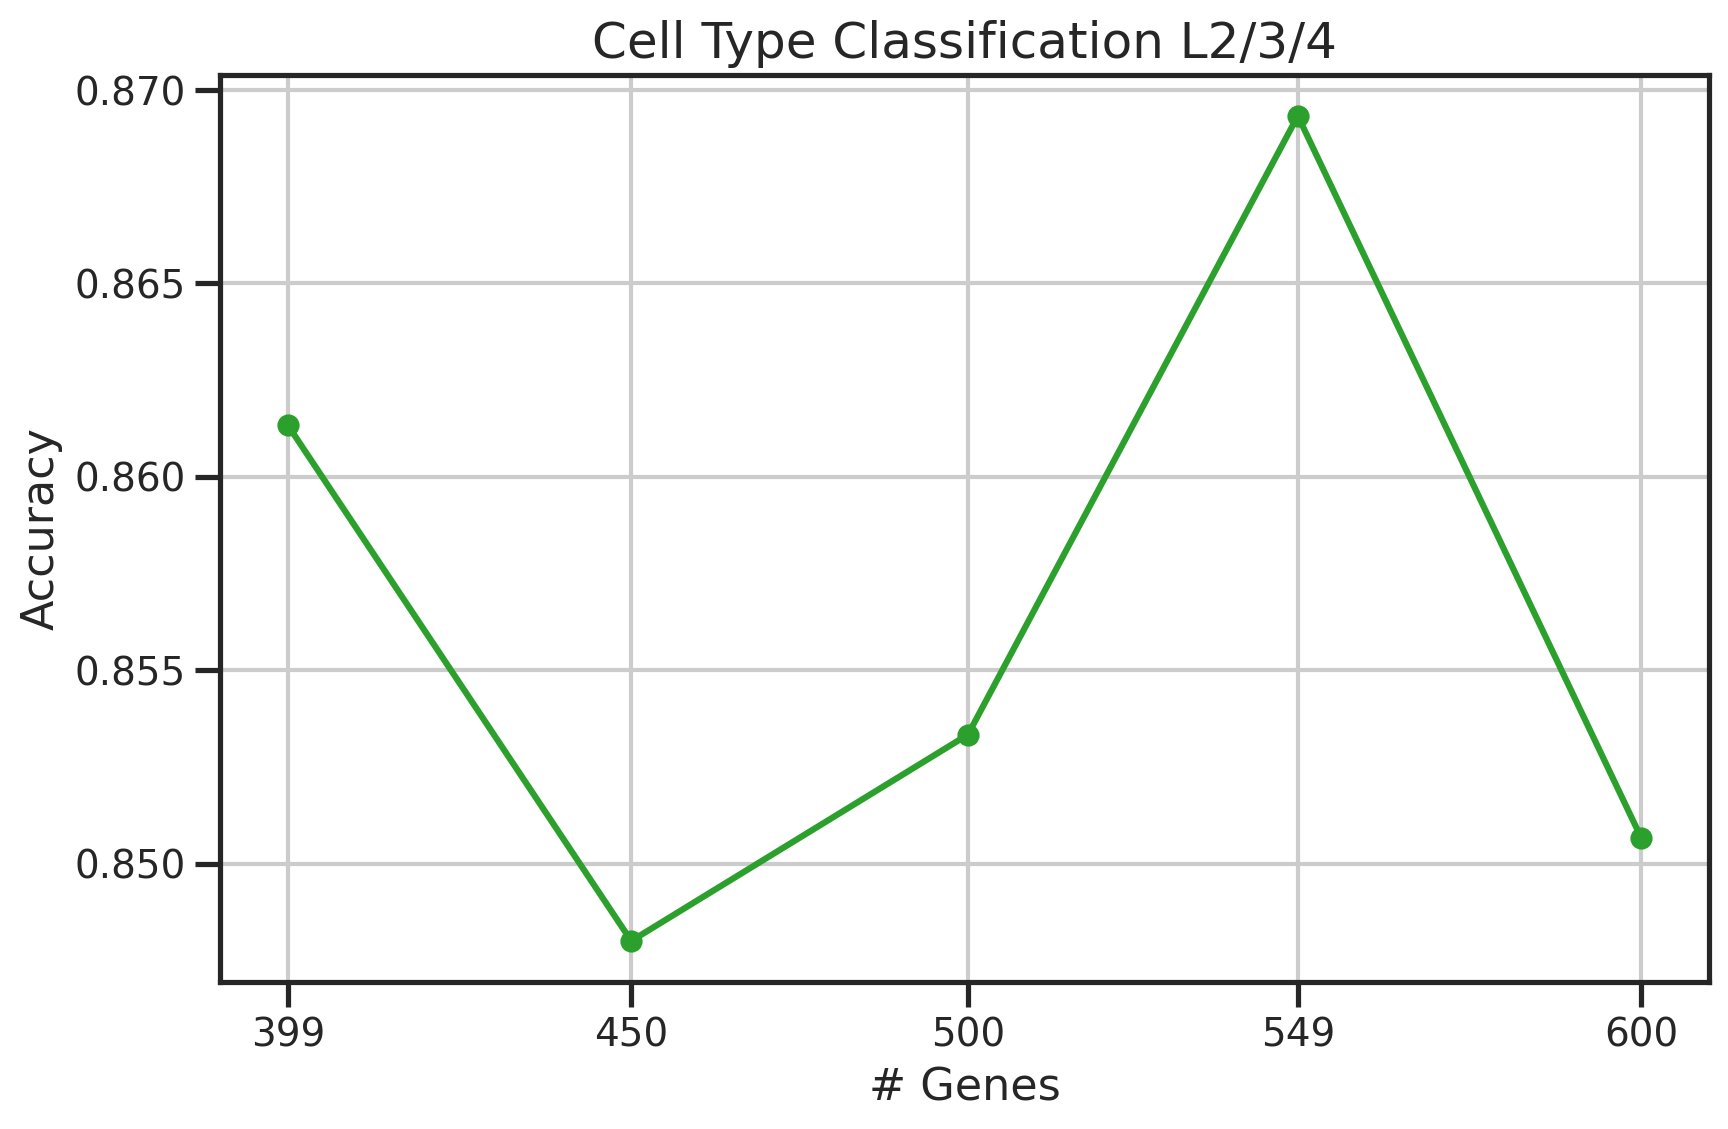

In [7]:
# Make plot
plt.figure(figsize=(9, 6))
plt.plot(num_features, [results['PROPOSE-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2',)
plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification L2/3/4', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
# plt.ylim([0,1])
plt.xticks(num_features)
plt.show()

In [8]:
results

{'PROPOSE-Class': {399: 0.8613333106040955,
  450: 0.8479999899864197,
  500: 0.8533333539962769,
  549: 0.8693333268165588,
  600: 0.8506666421890259}}

# get gene names

In [9]:
# which genes
with open(os.path.join(resdir, 'res_merfish_L234_allgenes_oct6.pkl'), 'rb') as f:
    res = pickle.load(f)
# res
for key in res.keys():
    print(key, np.unique(res[key]).shape)

399 (399,)
450 (450,)
500 (500,)
549 (549,)
600 (600,)


In [10]:
# which genes
with open(os.path.join(resdir, 'res_merfish_L234_allgenes_unsupervised_oct13.pkl'), 'rb') as f:
    res2 = pickle.load(f)
# res
for key in res2.keys():
    print(key, np.unique(res2[key]).shape)

200 (200,)
300 (300,)
399 (399,)
499 (499,)
595 (595,)


# vis data
# get heatmap

In [11]:
def rename_clsts(x):
    thedict = {
        'L2/3_A': 'L2/3_B',
        'L2/3_B': 'L2/3_A',
    }
    if x in thedict.keys():
        return thedict[x]
    else:
        return x

In [12]:
ddir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/counts/'
f = os.path.join(ddir, "P38_1a2a_glut.h5ad")
gene_names = anndata.read(f).var.index.values
np.array(gene_names[res[500]])

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


array(['Rgs20', 'Crispld1', 'Col19a1', '2010300C02Rik', 'Mob4', 'Aox4',
       'Ikzf2', 'Vwc2l', 'Sgpp2', 'Wdfy1', 'Dner', 'Hjurp', 'Hdac4',
       'D1Ertd622e', 'Cdh20', 'Bcl2', 'Cdh7', 'Cntnap5a', 'Ralb',
       'Gm28928', 'Lrrn2', 'Igfn1', 'Dennd1b', 'Lamc2', 'Rgs8', 'Gm36975',
       'Nos1ap', 'Igsf8', 'Pld5', 'Stum', 'Sde2', 'Kcnk2', 'Angel2',
       'Syt14', 'Ccdc3', 'Gm37340', 'Itga8', 'Plxdc2', 'Nebl', 'Etl4',
       'Gm17171', 'Col5a1', 'Ntng2', 'Ndufa8', 'Zeb2', 'Ccdc148', 'Cd302',
       'Grb14', 'Scn9a', 'Dcaf17', 'Pde1a', 'Zfp804a', 'Chst1', 'Ldlrad3',
       'Pamr1', 'Fbxo3', 'Bdnf', 'Ryr3', 'Lrrc57', 'Kcnip3', 'Kcns1',
       'Prex1', 'Ptpn1', 'Tshz2', 'Gm26883', 'Cdh4', 'Clcn5', 'Gm14636',
       'Tenm1', 'Smarca1', 'Mbnl3', 'Fgf13', 'Pnck', 'Prrg1', 'Eda',
       'Bhlhb9', 'Morf4l2', 'Il1rapl2', 'Tmem164', 'Trpc5', 'Gm15155',
       'Phka2', 'Rai2', 'Mid1', 'Zfhx4', 'Stmn2', 'Pag1', 'Cyp7b1',
       '4930419G24Rik', 'Trpc3', 'Lhfp', 'Kcnab1', 'A330015K06Rik',
       'G

In [13]:
f = '../data_dump/P38_glut.h5ad'
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 10485 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
adata = adata[adata.obs['cluster'].str.contains(r'^L2|L4')]
adata.obs['cluster'] = adata.obs['cluster'].apply(rename_clsts) 

# zscore
adata.X = basicu.zscore(adata.X, axis=0)
adata

/tmp/ipykernel_3086467/2239677930.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cluster'] = adata.obs['cluster'].apply(rename_clsts)
/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Utils/basicu.py:314: RuntimeWarning: invalid value encountered in true_divide
  return (v-np.mean(v, **kwargs))/(np.std(v, **kwargs))


AnnData object with n_obs × n_vars = 5837 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
Xk, xclsts = basicu.group_mean(adata.X, adata.obs['cluster'])
Xk = np.array(Xk)
Xk = pd.DataFrame(Xk, index=xclsts, columns=adata.var.index)
Xk.shape, xclsts.shape, xclsts

((6, 30869),
 (6,),
 array(['L2/3_A', 'L2/3_B', 'L2/3_C', 'L4_A', 'L4_B', 'L4_C'], dtype=object))

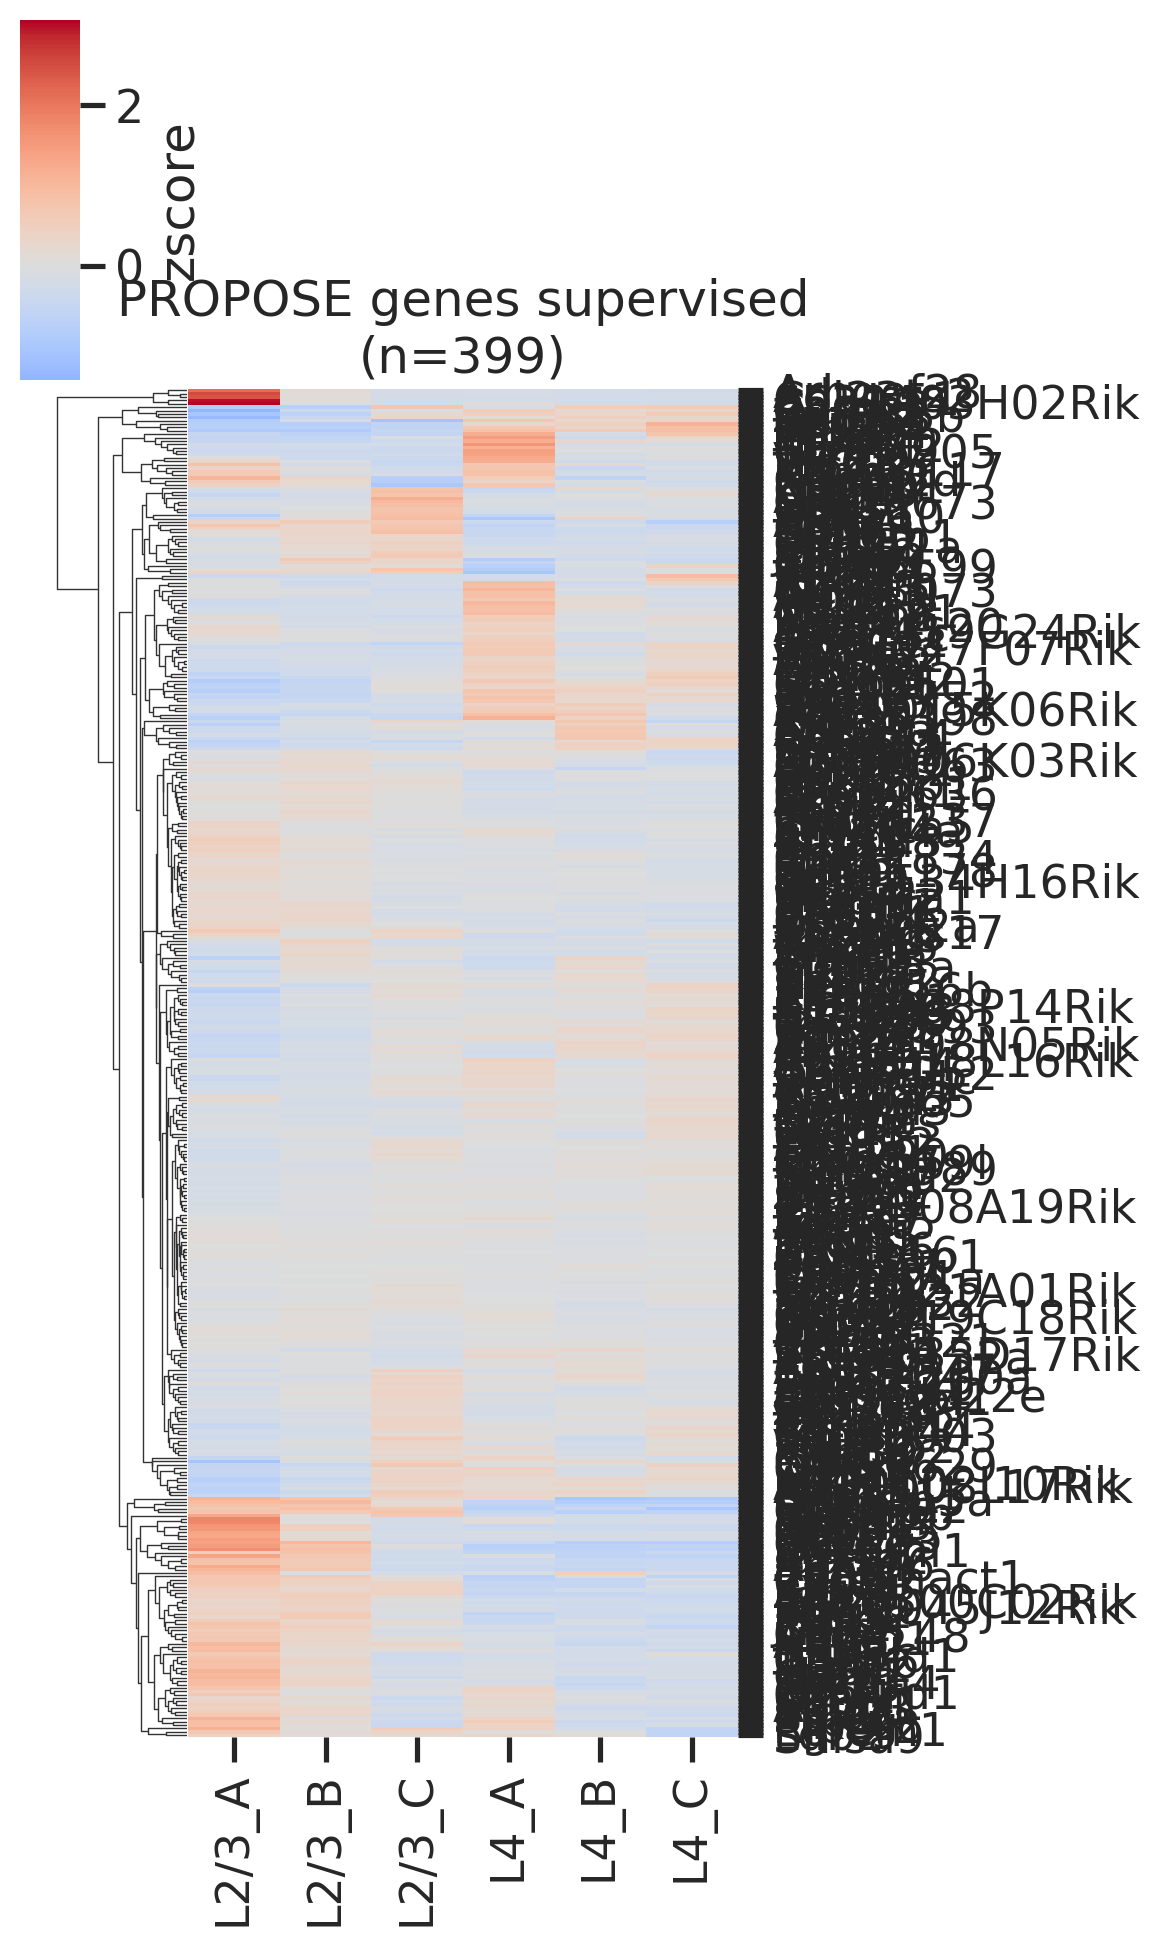

In [16]:
# for num in num_features[::-1]:
num = 399
X_s = Xk[gene_names[res[num]]].T
g = sns.clustermap(X_s,
                col_cluster=False,
                yticklabels=True,
                cmap='coolwarm',
                center=0,
                # vmax=1.5, vmin=-1.5,
                # vmax=2, vmin=-2,
                figsize=(6,min(10, num*0.4)), 
                cbar_kws=dict(label='zscore')
               )
g.ax_heatmap.set_title(f"PROPOSE genes supervised\n(n={len(X_s)})")
plt.show()

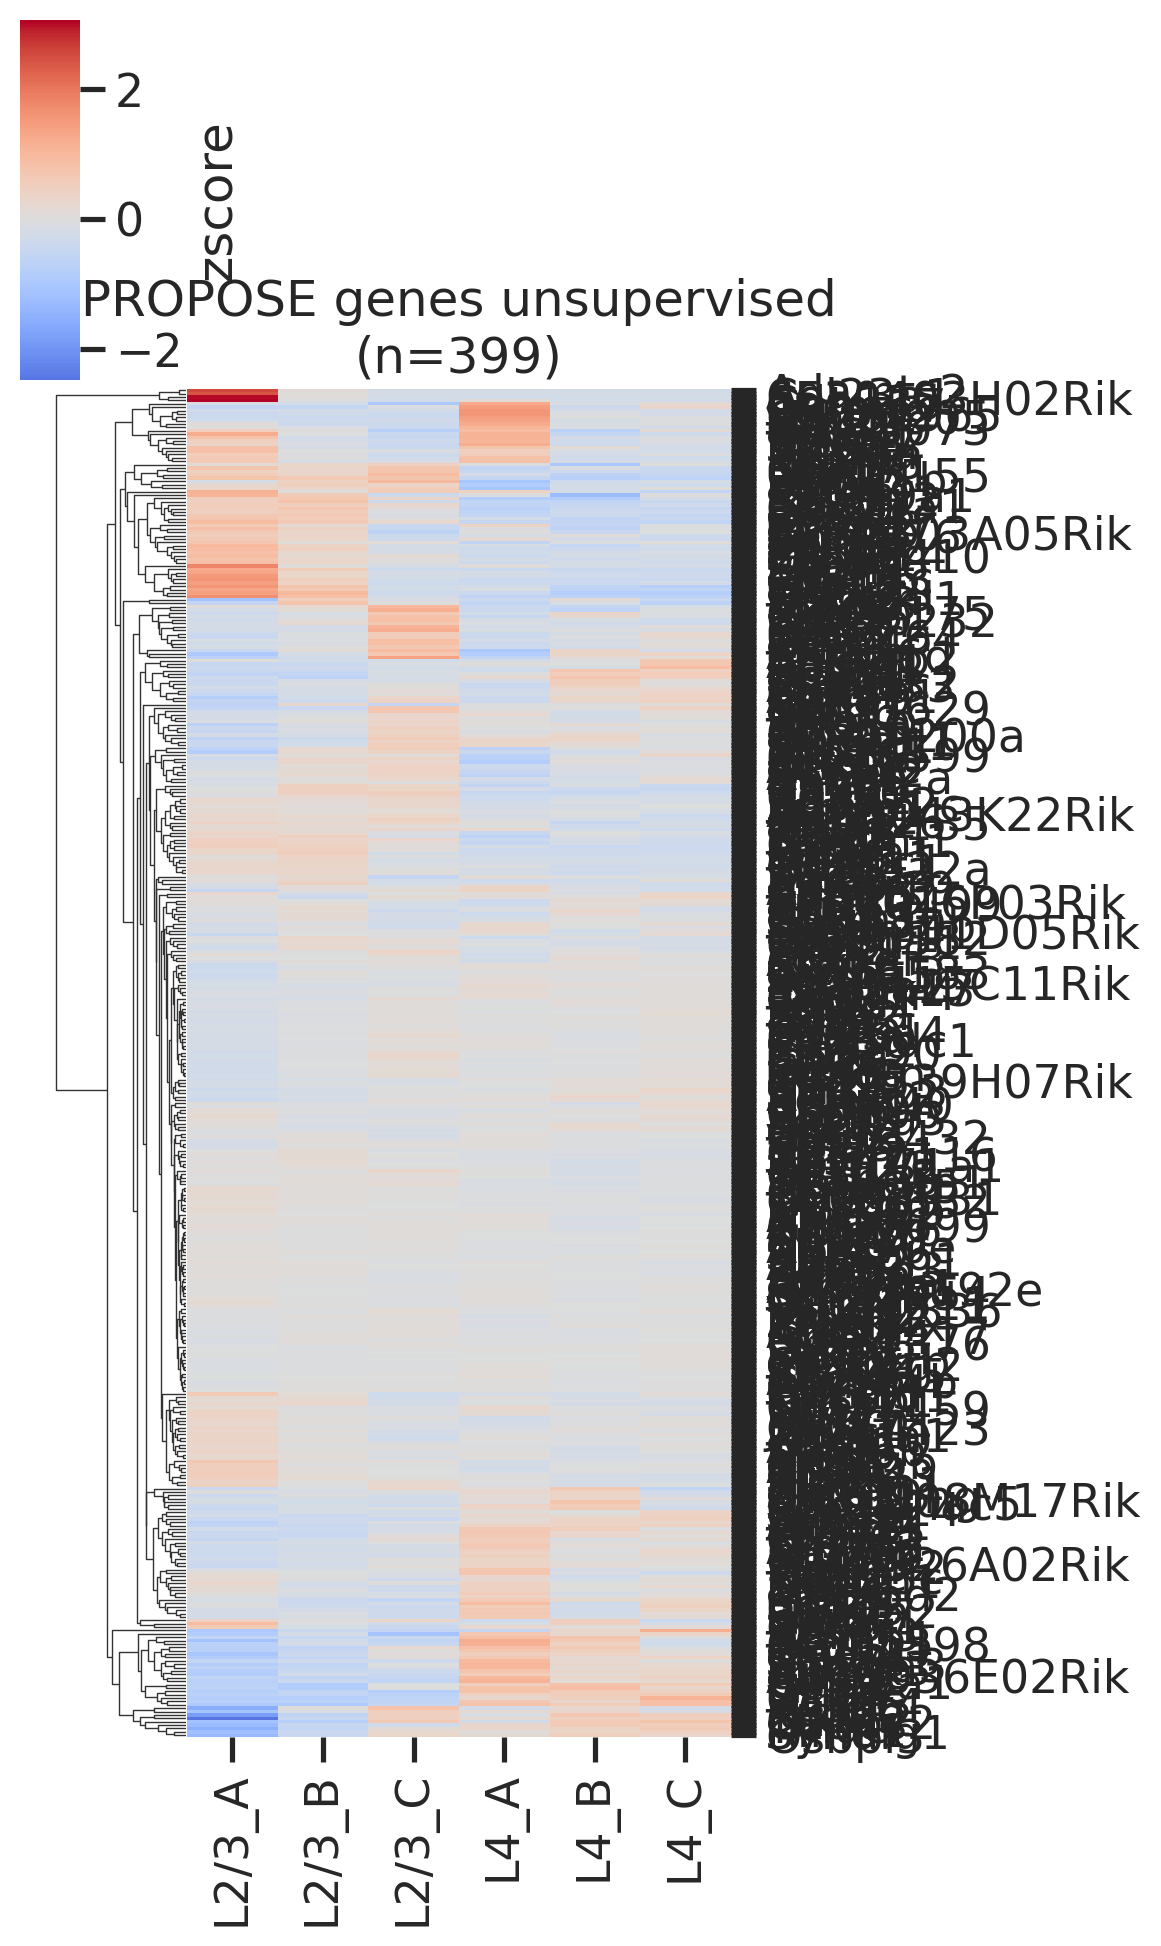

In [17]:
num = 399 
X_s = Xk[gene_names[res2[num]]].T
g = sns.clustermap(X_s,
                col_cluster=False,
                yticklabels=True,
                cmap='coolwarm',
                center=0,
                # vmax=1.5, vmin=-1.5,
                # vmax=2, vmin=-2,
                figsize=(6,min(10, num*0.4)), 
                cbar_kws=dict(label='zscore')
               )
g.ax_heatmap.set_title(f"PROPOSE genes unsupervised\n(n={len(X_s)})")
plt.show()

In [18]:
overlap = np.intersect1d(gene_names[res[399]], 
                       gene_names[res2[399]], 
                      )
overlap.shape

(89,)

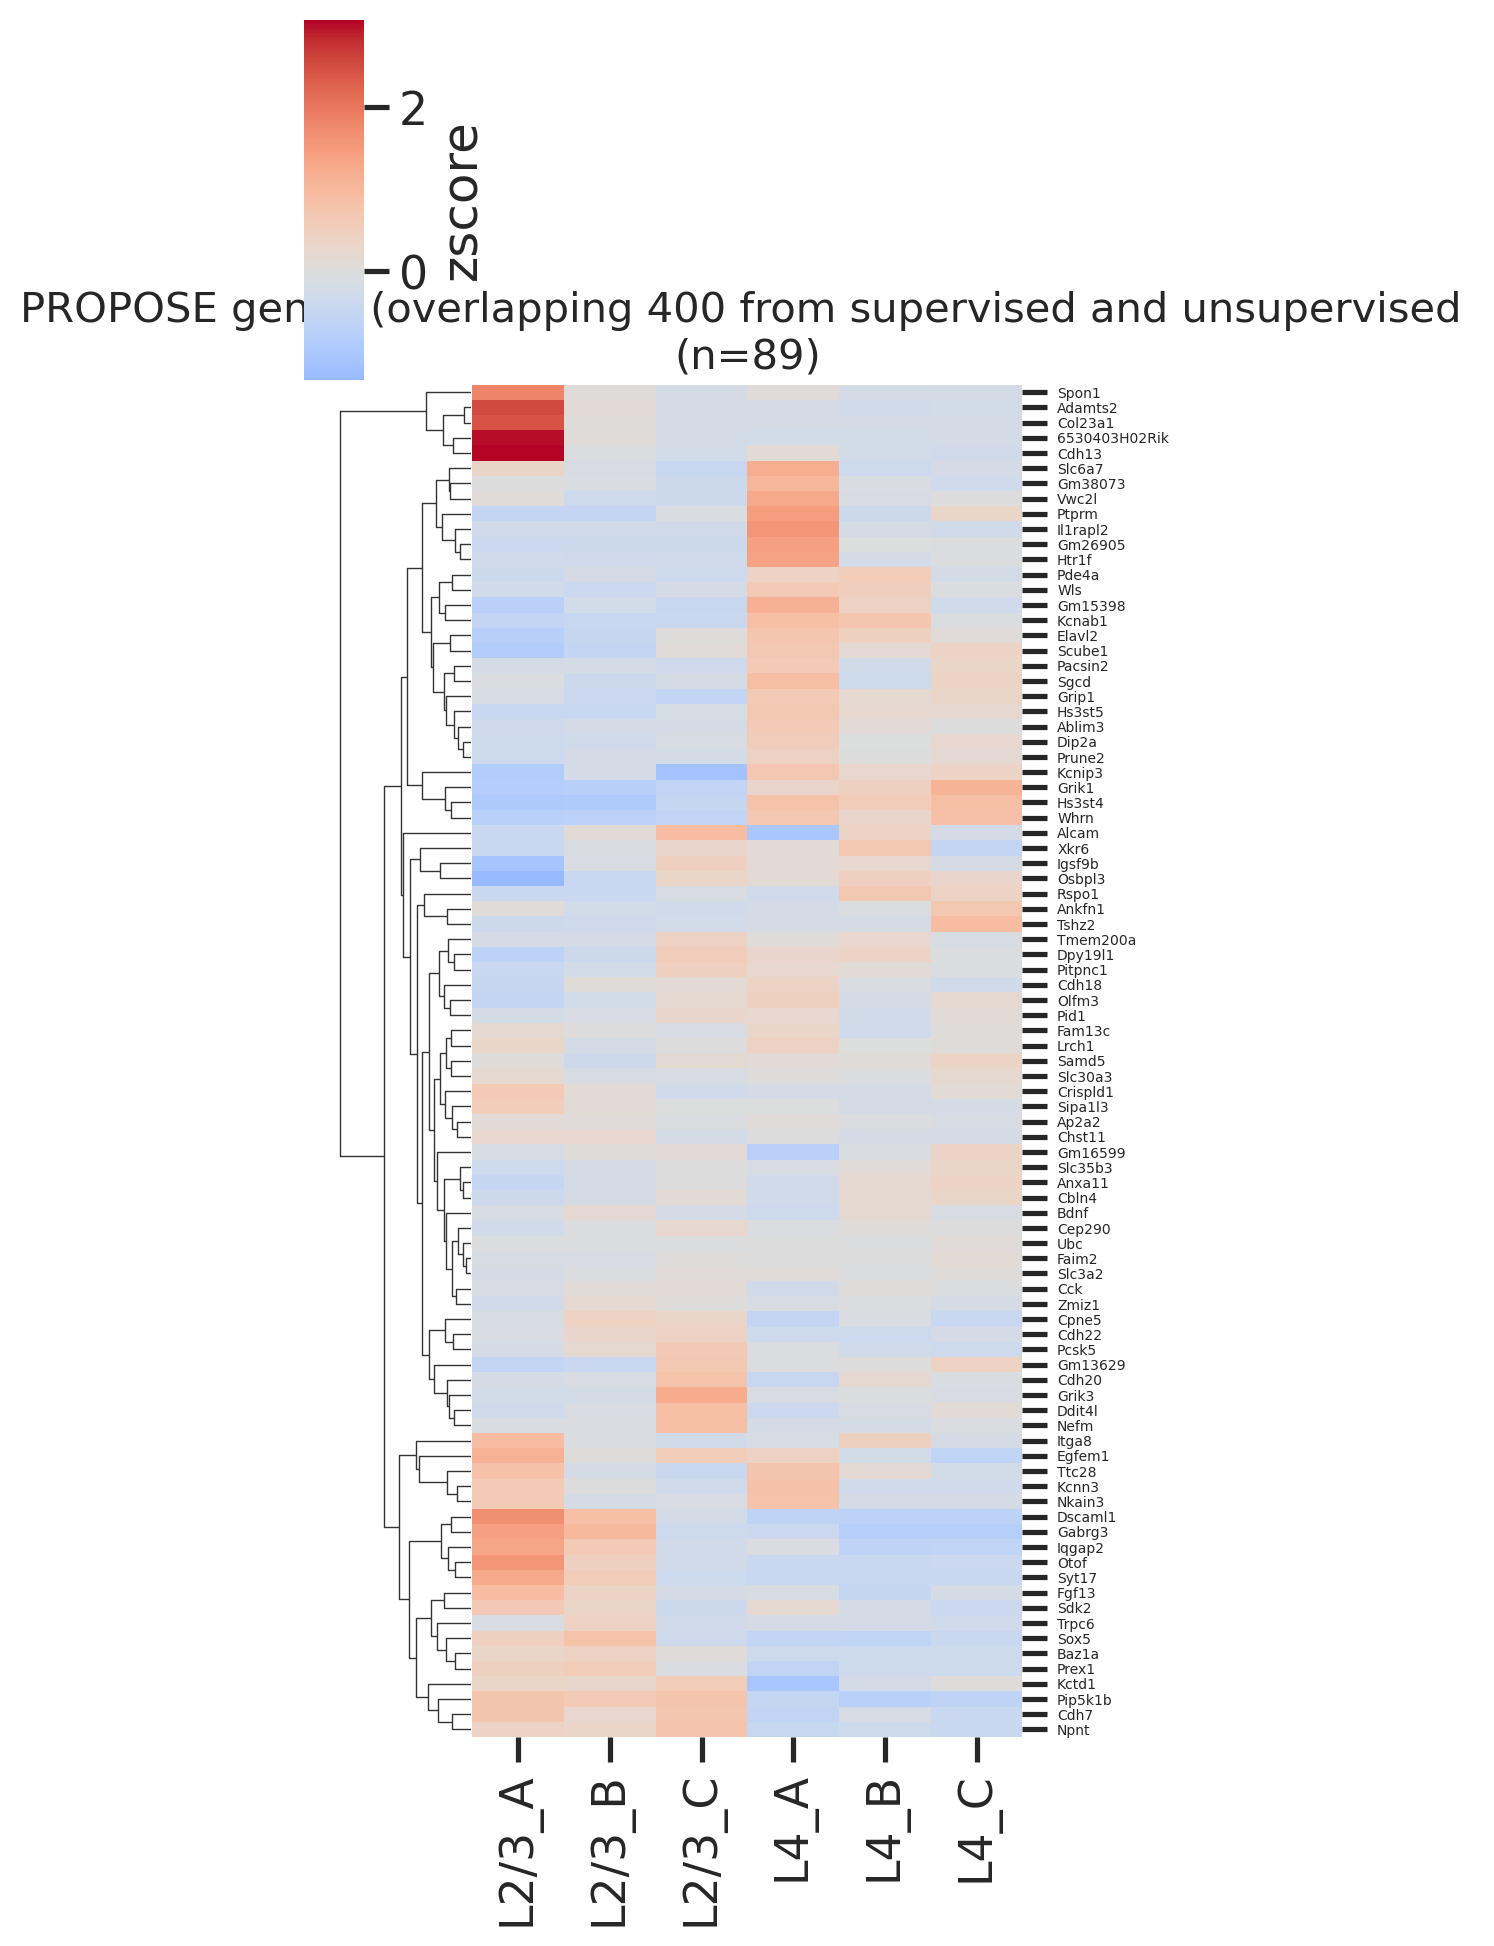

In [19]:
X_s = Xk[overlap].T
g = sns.clustermap(X_s,
                col_cluster=False,
                yticklabels=True,
                cmap='coolwarm',
                center=0,
                # vmax=1.5, vmin=-1.5,
                # vmax=2, vmin=-2,
                figsize=(6,min(10, num*0.4)), 
                cbar_kws=dict(label='zscore'),
               )
ax = g.ax_heatmap
ax.set_title(f"PROPOSE genes (overlapping 400 from supervised and unsupervised \n(n={len(X_s)})", fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5) #
plt.show()

In [20]:
num = 399
X_s = Xk[gene_names[res[num]]].T
X_s.to_csv("../results/propose_399genes_L234_supervised.csv")
X_s

,L2/3_A,L2/3_B,L2/3_C,L4_A,L4_B,L4_C
A830018L16Rik,-0.002676,-0.269064,0.087951,0.416894,-0.094427,0.187967
Jph1,0.544887,0.328395,0.176536,-0.455299,-0.134515,-0.311180
Crispld1,0.632002,0.133374,-0.303965,-0.196101,-0.240403,0.122644
2010300C02Rik,0.290433,0.442777,0.042874,-0.257088,-0.274571,-0.393493
Pgap1,-0.051633,-0.056495,-0.149209,0.084000,0.122790,0.024672
...,...,...,...,...,...,...
Pcgf5,0.103251,0.048963,0.087266,-0.024735,-0.092367,-0.052027
Sorcs1,-1.423486,-0.369501,-0.087476,0.590042,0.228057,0.341635
Mxi1,-0.376752,-0.120876,0.096974,-0.162117,0.272239,0.105474
Shtn1,0.294815,-0.029479,0.004660,0.184948,-0.163067,-0.002809


In [22]:
num = 399
X_s = Xk[gene_names[res2[num]]].T
X_s.to_csv("../results/propose_399genes_L234_unsupervised.csv")
X_s

,L2/3_A,L2/3_B,L2/3_C,L4_A,L4_B,L4_C
Rgs20,0.027359,0.478069,0.522655,-0.471524,-0.487162,-0.338397
Kcnb2,0.000128,0.217347,-0.540988,0.140772,-0.028991,-0.141060
Crispld1,0.632002,0.133374,-0.303965,-0.196101,-0.240403,0.122644
Kcnq5,-1.574373,0.048739,0.807159,-0.213403,0.241146,-0.219274
Rims1,-1.513921,-0.547034,0.167199,0.280951,0.345616,0.611720
...,...,...,...,...,...,...
Mamdc2,-0.414985,-0.113459,-0.188332,-0.193204,0.538021,0.058035
Pip5k1b,0.764524,0.637423,0.768760,-0.511804,-0.743385,-0.621370
Pgam1,-0.147464,-0.020716,0.102480,-0.050719,0.007467,0.035684
Sorcs3,-0.525365,0.788479,0.011342,-0.552892,-0.137929,-0.681168
